<a href="https://colab.research.google.com/github/nehakale8/Wild-Blueberries-ML-/blob/main/Blueberries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install dabl
import dabl

     |████████████████████████████████| 563kB 8.7MB/s 
     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Import Data And Preprocessing

In [ ]:
df=pd.read_csv('/content/WildBlueberryPollinationSimulationData.csv')
print(df.shape)
df.head()
df.info()

(777, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass    

In [ ]:
dataset=df.copy()
dataset.drop('Row#',inplace=True,axis=1)
dataset.head()
dataset.drop('yield',inplace=True,axis=1)
dataset

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.410652,0.408159,31.678898
1,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,0.444254,0.425458,33.449385
2,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.383787,0.399172,30.546306
3,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.407564,0.408789,31.562586
4,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.354413,0.382703,28.873714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471
773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005
774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240
775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161


In [ ]:
output=df["yield"].copy()
output

0      3813.165795
1      4947.605663
2      3866.798965
3      4303.943030
4      3436.493543
          ...     
772    5333.873335
773    3373.436842
774    4203.027624
775    4166.299735
776    3943.131681
Name: yield, Length: 777, dtype: float64

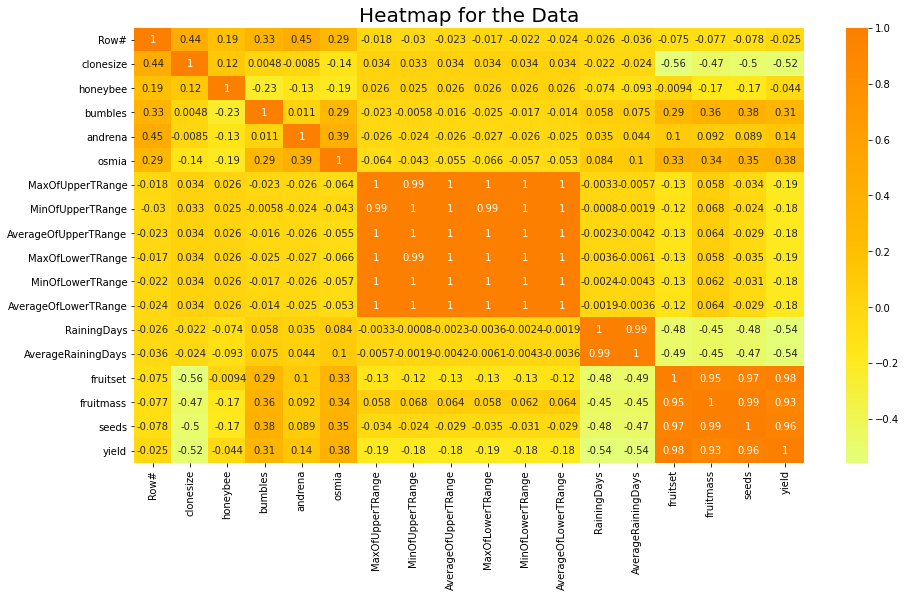

In [ ]:

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

In [ ]:
nan_in_df = df.isnull().values.any()
nan_in_df

False

# Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/dabl/plot/supervised.py:547: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)


Target looks like regression


/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 1 outliers in column bumbles.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 4 outliers in column honeybee.
  int(dropped), series.name), UserWarning)


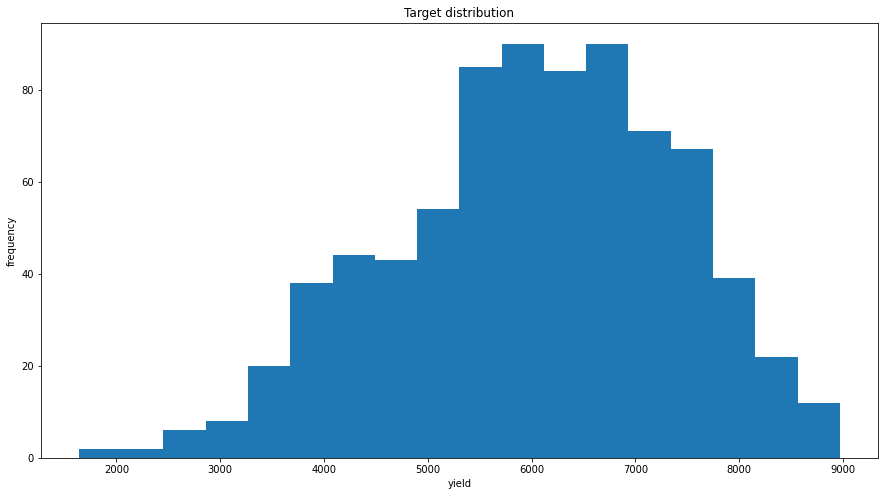

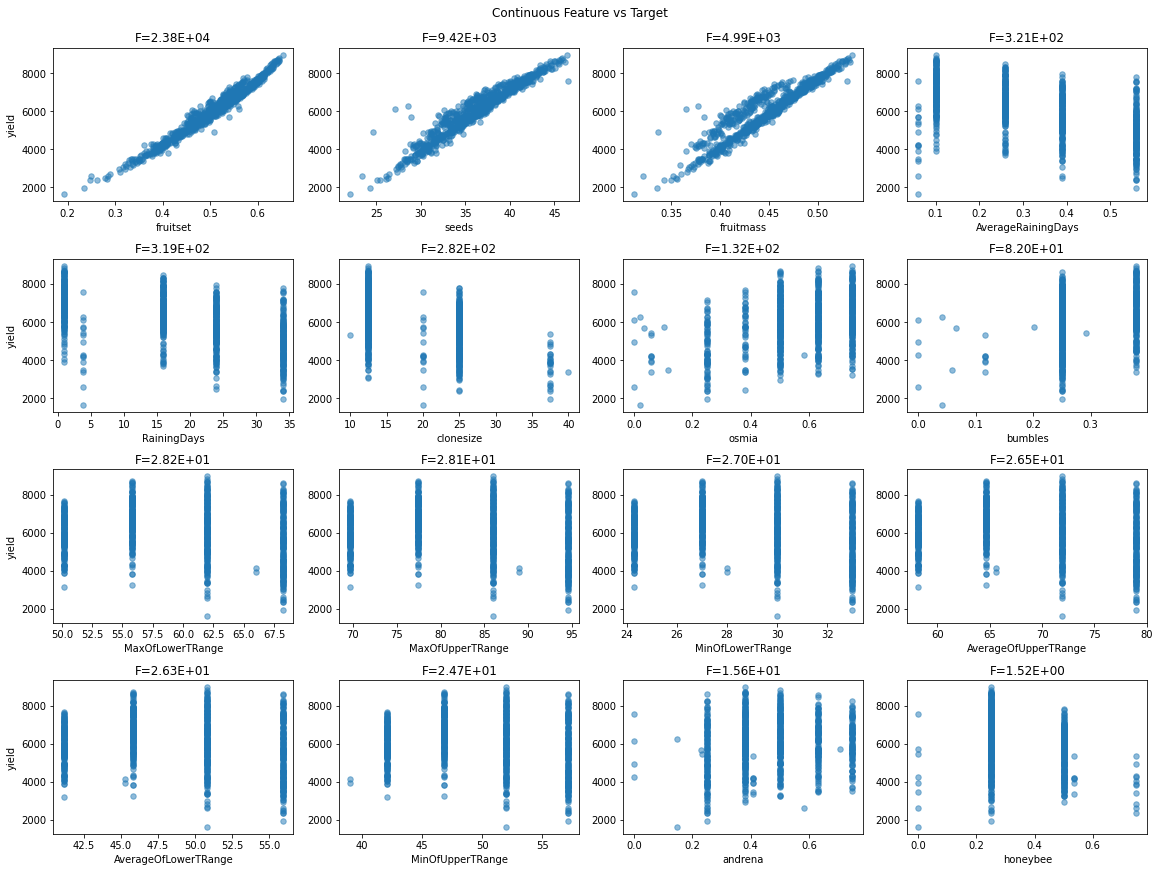

In [ ]:
dabl.plot(df,'yield')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(dataset,output,test_size=0.3,random_state=0)
print(X_train)
print(y_train)
print(type(X_train))

     clonesize  honeybee  bumbles  ...  fruitset  fruitmass      seeds
475       25.0     0.500    0.250  ...  0.479733   0.443962  35.555115
34        25.0     0.250    0.250  ...  0.502622   0.454522  36.617049
662       25.0     0.500    0.380  ...  0.504170   0.453131  36.430716
513       25.0     0.500    0.250  ...  0.497275   0.450750  36.362937
773       40.0     0.537    0.117  ...  0.342841   0.377915  28.462005
..         ...       ...      ...  ...       ...        ...        ...
763       20.0     6.640    0.065  ...  0.539256   0.382997  28.887120
192       12.5     0.250    0.250  ...  0.553032   0.471189  38.452522
629       25.0     0.500    0.250  ...  0.493690   0.447157  35.807062
559       25.0     0.500    0.250  ...  0.360996   0.388860  29.558019
684       25.0     0.500    0.380  ...  0.552071   0.476383  39.230391

[543 rows x 16 columns]
475    5636.308737
34     5831.706600
662    5794.891846
513    5964.791108
773    3373.436842
          ...     
763    56

# Modelling 

In [ ]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(type(X_train))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_train)
print(X_test)
print(type(X_train))
X_train

<class 'pandas.core.frame.DataFrame'>
[[0.45454545 0.02712968 0.65789474 ... 0.62471438 0.59015604 0.55478945]
 [0.45454545 0.01356484 0.65789474 ... 0.67453539 0.63735384 0.59850815]
 [0.45454545 0.02712968 1.         ... 0.67790473 0.63113614 0.59083701]
 ...
 [0.45454545 0.02712968 0.65789474 ... 0.65509301 0.60443685 0.56516183]
 [0.45454545 0.02712968 0.65789474 ... 0.36625918 0.34387896 0.30789524]
 [0.45454545 0.02712968 1.         ... 0.7821718  0.73505894 0.70609672]]
[[0.         0.01356484 0.65789474 ... 0.79136576 0.72500739 0.691182  ]
 [0.         0.01356484 0.65789474 ... 0.47639065 0.41411848 0.36744969]
 [0.45454545 0.02712968 0.65789474 ... 0.75568822 0.70163498 0.66951359]
 ...
 [0.         0.01356484 0.65789474 ... 0.76053967 0.68488662 0.64847946]
 [0.         0.01356484 0.65789474 ... 0.92687475 0.87695749 0.85815273]
 [0.         0.01356484 0.65789474 ... 0.58385285 0.41314664 0.42943541]]
<class 'numpy.ndarray'>


array([[0.45454545, 0.02712968, 0.65789474, ..., 0.62471438, 0.59015604,
        0.55478945],
       [0.45454545, 0.01356484, 0.65789474, ..., 0.67453539, 0.63735384,
        0.59850815],
       [0.45454545, 0.02712968, 1.        , ..., 0.67790473, 0.63113614,
        0.59083701],
       ...,
       [0.45454545, 0.02712968, 0.65789474, ..., 0.65509301, 0.60443685,
        0.56516183],
       [0.45454545, 0.02712968, 0.65789474, ..., 0.36625918, 0.34387896,
        0.30789524],
       [0.45454545, 0.02712968, 1.        , ..., 0.7821718 , 0.73505894,
        0.70609672]])

In [ ]:
model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(np.mean((y_test - y_pred)**2))
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))
#print(y_pred)
print("     RMSE: {:.2f}".format(rmse))
print("R^2 Score: {:5f}".format(r2))
#y_test - y_pred

     RMSE: 163.32
R^2 Score: 0.985599


In [ ]:
#Linear Regression
regressor=LinearRegression()
regressor.fit(X_train, y_train)
y_pred_linear= regressor.predict(X_test)
y_pred_linear

array([  6732.8897555 ,   4260.1427099 ,   6858.3364518 ,   3964.66760966,
         4396.51026051,   6521.96553591,   5681.85544232,   7478.29870449,
         8195.52190807,   4811.74219998,   2961.12602854,   6636.97894291,
         6766.24618966, -11466.40497082,   6894.59845582,   6862.40811071,
         6507.92204521,   7858.76983113,   6953.27320418,   4031.93847156,
         6753.98117674,   7714.0218058 ,   6705.91959062,   6242.07813302,
         4207.47972157,   6440.64681129,   5356.5303152 ,   6265.75222487,
         4717.57486711,   6140.7315854 ,   4832.56940771,   8024.71060424,
         5220.91035837,   6502.07934193,   8738.218303  ,   5403.92745943,
         7154.23473547,   6660.58101129,   6714.57853077,   4879.50334132,
         5327.90722946,   6055.86837184,   6238.92481055,   6045.68469101,
         4638.74623757,   6454.03558545,   4056.69536935,   7205.01811582,
         5045.66491859,   8221.21708866,   4417.87941494,   6409.57680637,
         8436.41690388,  

# Model Evaluation


In [ ]:
rmse = np.sqrt(np.mean((y_test - y_pred_linear)**2))
r2 = 1 - (np.sum((y_test - y_pred_linear)**2) / np.sum((y_test - y_test.mean())**2))

print("     RMSE: {:.2f}".format(rmse))
print("R^2 Score: {:5f}".format(r2))
#print("Accuracy is:",accuracy_score(y_test,y_pred_linear.round(), normalize=True))
y_test - y_pred_linear

     RMSE: 1465.17
R^2 Score: -0.159031


150     62.992118
122     97.680208
546    435.199718
14     -64.323568
542     -8.768408
          ...    
211    157.664051
613     48.119291
165   -109.083172
188     75.767341
338   -140.054341
Name: yield, Length: 234, dtype: float64

# Hyperparameter Tuning

In [ ]:
#Random Forest Regressor
params = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [2, 4, 6, 8, 10]
}

model = GridSearchCV(RandomForestRegressor(random_state=0), params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(np.mean((y_test - y_pred)**2))
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))

print("     RMSE: {:.2f}".format(rmse))
print("R^2 Score: {:5f}".format(r2))

     RMSE: 163.17
R^2 Score: 0.985625


# Prediction

# Model Explainability (Explainable AI)